#Решающие деревья

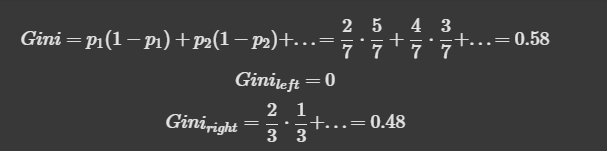

In [18]:
# Импорты
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from collections import Counter

##Задача 1


Постройте регрессионное дерево для прогнозирования  y  с помощью  x  на обучающей выборке:

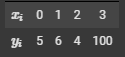

Критерий деления узла на два — минимизация  RSS . Дерево строится до трёх терминальных узлов.

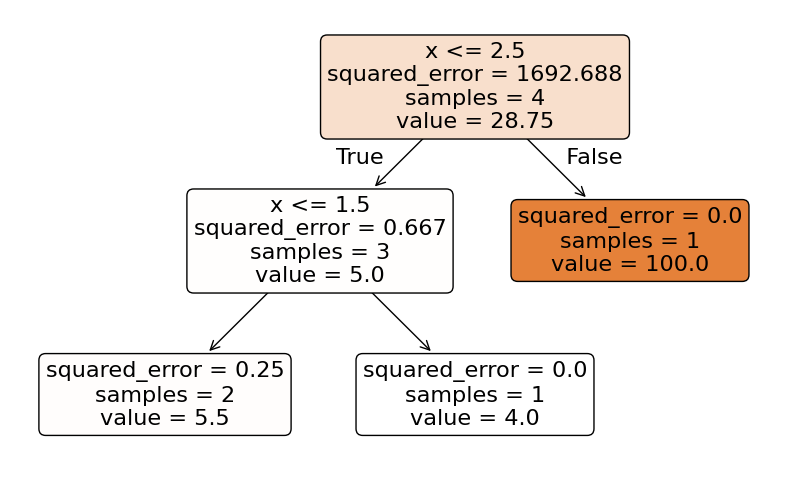

Предсказанные значения: [  5.5   5.5   4.  100. ]


In [19]:
features = np.array([0, 1, 2, 3]).reshape(-1, 1)
target_values = np.array([5, 6, 4, 100])

decision_tree_model = DecisionTreeRegressor(max_depth=2, random_state=42)

decision_tree_model.fit(features, target_values)

plt.figure(figsize=(10, 6))
plot_tree(decision_tree_model, filled=True, feature_names=['x'], rounded=True)
plt.show()

predicted_values = decision_tree_model.predict(features)
print("Предсказанные значения:", predicted_values)

##Задача 2


Постройте регрессионное дерево для прогнозирования  y  с помощью  x  на обучающей выборке:

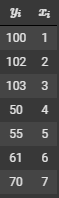


Критерий деления узла на два — минимизация  RSS . Узлы делятся до тех пор, пока в узле остаётся больше двух наблюдений.

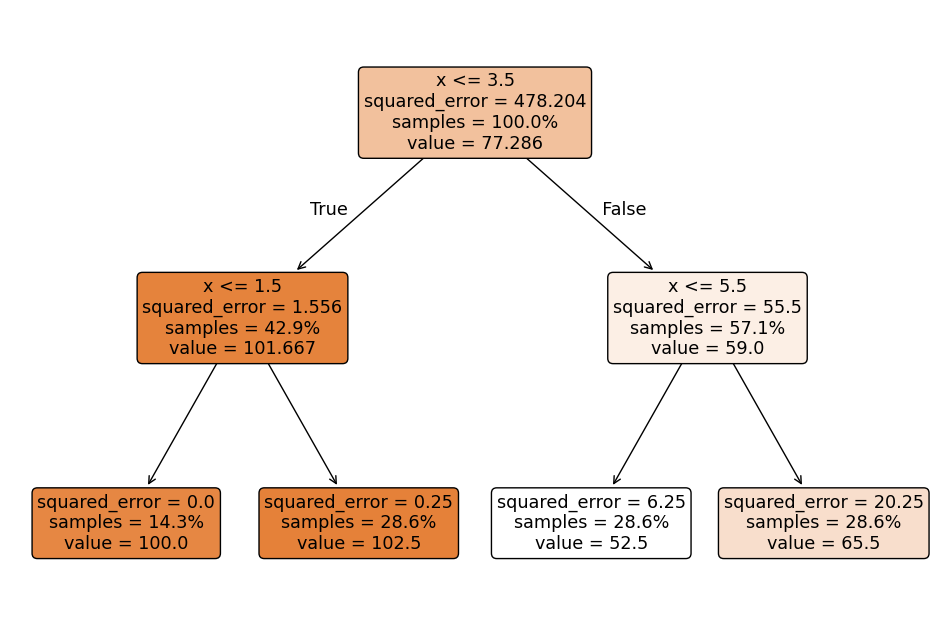

Предсказанные значения: [100.  102.5 102.5  52.5  52.5  65.5  65.5]


In [20]:
features = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
target_values = np.array([100, 102, 103, 50, 55, 61, 70])

decision_tree_model = DecisionTreeRegressor(min_samples_split=3, random_state=42)

decision_tree_model.fit(features, target_values)
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=['x'], rounded=True, proportion=True)
plt.show()
predicted_values = decision_tree_model.predict(features)
print("Предсказанные значения:", predicted_values)

##Задача 3


Дон-Жуан предпочитает брюнеток. Перед Новым Годом он посчитал, что в записной книжке у него 20 блондинок, 40 брюнеток, две рыжих и восемь шатенок. С Нового Года Дон-Жуан решил перенести все сведения в две записные книжки, в одну — брюнеток, во вторую — остальных.

Как изменились индекс Джини и энтропия в результате такого разбиения?

In [21]:
# Счетчик для разных групп
color_counts = {'блондинки': 20, 'брюнетки': 40, 'рыжие': 2, 'шатенки': 8}
total_count = sum(color_counts.values())

# Функция для расчета индекса Джини
def calculate_gini_index(counts):
    proportions = np.array(list(counts.values())) / sum(counts.values())
    return 1 - np.sum(proportions ** 2)

# Функция для расчета энтропии
def calculate_entropy(counts):
    proportions = np.array(list(counts.values())) / sum(counts.values())
    return -np.sum(proportions * np.log2(proportions + 1e-10))

# Расчет показателей до разбиения
gini_index_before = calculate_gini_index(color_counts)
entropy_before = calculate_entropy(color_counts)

# Группы после разбиения
group1_counts = {'брюнетки': 40}
group2_counts = {'блондинки': 20, 'рыжие': 2, 'шатенки': 8}

# Расчет индекса Джини и энтропии для каждой группы
gini_index_group1 = calculate_gini_index(group1_counts)
gini_index_group2 = calculate_gini_index(group2_counts)
gini_index_after = (40 / 70) * gini_index_group1 + (30 / 70) * gini_index_group2

entropy_group1 = calculate_entropy(group1_counts)
entropy_group2 = calculate_entropy(group2_counts)
entropy_after = (40 / 70) * entropy_group1 + (30 / 70) * entropy_group2

# Вывод результатов
print(f"Джини до разбиения: {gini_index_before:.4f}")
print(f"Энтропия до разбиения: {entropy_before:.4f}")
print(f"Джини после разбиения: {gini_index_after:.4f}")
print(f"Энтропия после разбиения: {entropy_after:.4f}")

Джини до разбиения: 0.5780
Энтропия до разбиения: 1.4819
Джини после разбиения: 0.2057
Энтропия после разбиения: 0.4967


##Задача 4


Приведите примеры наборов данных, для которых индекс Джини равен  0 ,  0.5  и  0.999 .

In [22]:
# Объекты одного класса
single_class_data = ['A'] * 9
# Объекты двух классов распределены равномерно
uniform_distribution_data = ['A'] * 9 + ['B'] * 9
# Абсолютное преобладание объектов одного класса
dominant_class_data = ['A'] + ['B'] * 9999

def calculate_small_gini_index(data):
    class_counts = Counter(data)
    proportions = np.array(list(class_counts.values())) / len(data)
    return 1 - np.sum(proportions ** 2)

def calculate_majority_gini_index(data):
    class_counts = Counter(data)
    proportions = np.array(list(class_counts.values())) / len(data)
    return np.sum(proportions ** 2)

result_single_class = calculate_small_gini_index(single_class_data)
result_uniform_distribution = calculate_small_gini_index(uniform_distribution_data)
result_dominant_class = calculate_majority_gini_index(dominant_class_data)

print(f"Джини в случае одного класса: {result_single_class}")
print(f"Джини в случае равномерного распределения: {result_uniform_distribution}")
print(f"Джини в случае тотальной доминации одного класса: {round(result_dominant_class, 4)}")

Джини в случае одного класса: 0.0
Джини в случае равномерного распределения: 0.5
Джини в случае тотальной доминации одного класса: 0.9998


##Задача 5


Машка пять дней подряд гадала на ромашке, а затем выкладывала очередную фотку «Машка с ромашкой» в инстаграмчик. Результат гадания — переменная  yi , количество лайков у фотки — переменная  xi . Постройте классификационное дерево для прогнозирования  yi  с помощью  xi  на обучающей выборке:


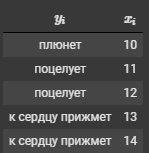


Дерево строится до идеальной классификации. Критерий деления узла на два — максимальное падение индекса Джини.

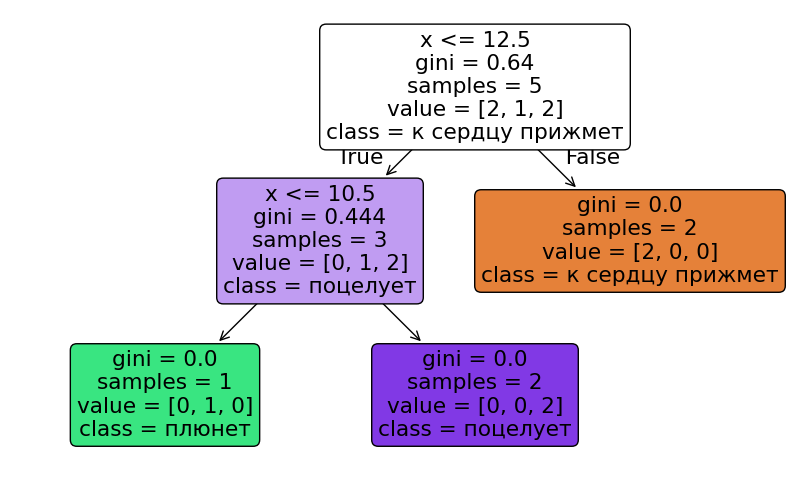

Предсказанные значения: ['плюнет' 'поцелует' 'поцелует' 'к сердцу прижмет' 'к сердцу прижмет']


In [23]:
# Признаки
feature_data = np.array([10, 11, 12, 13, 14]).reshape(-1, 1)
# Целевые метки
target_labels = np.array(['плюнет', 'поцелует', 'поцелует', 'к сердцу прижмет', 'к сердцу прижмет'])

# Создание модели дерева решений
decision_tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Обучение модели
decision_tree_classifier.fit(feature_data, target_labels)

# Визуализация дерева решений
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_classifier, filled=True, feature_names=['x'], class_names=decision_tree_classifier.classes_, rounded=True)
plt.show()

# Прогнозирование значений
predicted_labels = decision_tree_classifier.predict(feature_data)
print("Предсказанные значения:", predicted_labels)